# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [1]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [2]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

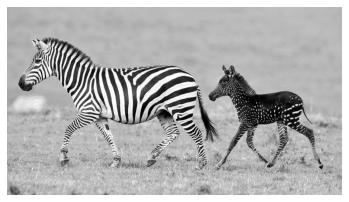

In [3]:
myimshow(zebra)

In [4]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

In [5]:
kernel = genGabor((64,64),5,90)
print(kernel)

[[-0.00000000e+000 -0.00000000e+000  0.00000000e+000 ...  0.00000000e+000
  -0.00000000e+000  0.00000000e+000]
 [-0.00000000e+000  0.00000000e+000 -0.00000000e+000 ... -0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000 -0.00000000e+000 -7.53944176e-321 ... -0.00000000e+000
   0.00000000e+000 -0.00000000e+000]
 ...
 [ 0.00000000e+000 -0.00000000e+000 -0.00000000e+000 ... -3.72999719e-300
   5.18188407e-303 -6.96567604e-307]
 [ 0.00000000e+000 -0.00000000e+000  0.00000000e+000 ...  1.53662074e-317
  -7.53944176e-321 -0.00000000e+000]
 [-0.00000000e+000  0.00000000e+000  0.00000000e+000 ... -0.00000000e+000
  -0.00000000e+000  0.00000000e+000]]


2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

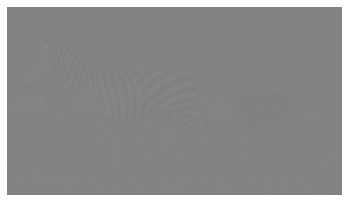

In [6]:
img_filtered = convolve(zebra, kernel)
'''
Con i parametri utilizzati precedntemente quello che riesco ad ottenere è l'eliminazione dello sfondo all'interno dell'immagine.
Ciò che viene risaltato sono le strisce presenti sul corpo della zebra, mostrando solo la lasgoma delle strisce e dell'animale stesso.
Per quanto riguarda il secondo animale a destra viene messa in evidenza la sua sagoma e vengono leggermente messsi in risalto i "pallini" 
presenti sul corpo.

In generale quello che sembra riuscire a mettere in evidenza sono le eventuali tezture/pattern presenti all'interno dell'immagine
'''
myimshow(img_filtered)

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

'\nNon conoscendo esattamente il funzionamento del filtro gabor propongo due differenti soluzioni:\nNella prima, presumo la più corretta, dovrebbe essere evidenziata la zona in cui vengono rilevate e bande diagonali.\n\nNella seconda invece le bande vengono come ricalcate, non penso sia la soluzione corretta\n'

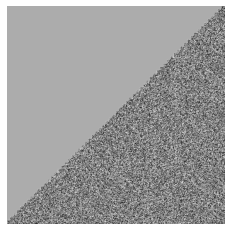

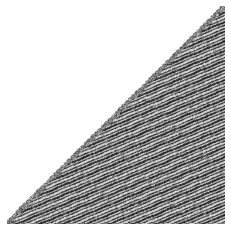

In [7]:
kernel2 = genGabor((64,64),5,47)
kernel3 = genGabor((64,64),3,45)
gb = imageio.imread('gabor1.jpg')

gb_filtered = convolve(gb, kernel2)
gb_filtered2 = convolve(gb, kernel3)
myimshow(gb_filtered)
myimshow(gb_filtered2)

'''
Non conoscendo esattamente il funzionamento del filtro gabor propongo due differenti soluzioni:
Nella prima, presumo la più corretta, dovrebbe essere evidenziata la zona in cui vengono rilevate e bande diagonali.

Nella seconda invece le bande vengono come ricalcate, non penso sia la soluzione corretta
'''

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

In [8]:
'''
Il filtro più semplice che permette di rilevare i contorni è il filtro di Sobel. In particolare abbiamo il filtro sobel_x 
che permette di trovare le variazioni di colore sull'asse delle x e il filtro sobel_y che permette di trovare le variazioni di colore 
sull'asse delle y.
I risultati che si ottengono dai due filtri possono essere combinati uttenendo il gradiente, che permette di rilevare le variazioni di colori
in tutte le direzioni evidenziando i contorni presenti nell'immagine.

E' piu semplice dal punto di vista dell'applicazione, bisogna applicare solamente due filtri.
'''

"\nIl filtro più semplice che permette di rilevare i contorni è il filtro di Sobel. In particolare abbiamo il filtro sobel_x \nche permette di trovare le variazioni di colore sull'asse delle x e il filtro sobel_y che permette di trovare le variazioni di colore \nsull'asse delle y.\nI risultati che si ottengono dai due filtri possono essere combinati uttenendo il gradiente, che permette di rilevare le variazioni di colori\nin tutte le direzioni evidenziando i contorni presenti nell'immagine.\n\nE' piu semplice dal punto di vista dell'applicazione, bisogna applicare solamente due filtri.\n"

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

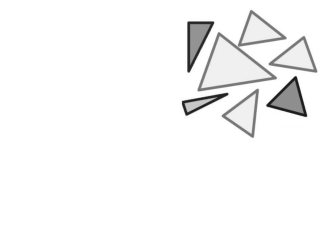

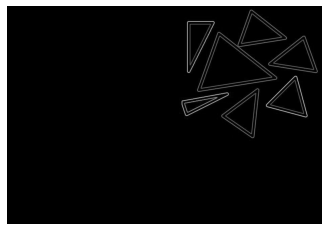

In [9]:
from skimage import filters


triangoli =  rgb2gray(imageio.imread('triangoli.jpg'))
myimshow(triangoli)

triangoli_sobel = filters.sobel(triangoli)

myimshow(triangoli_sobel)

# nella seconda immagine il risultato del fitro sobel, che permette di mostrare i contorni dei triangoli, sia in verticale che in orizzontale


# Esercizio 3

Mostrare gli effetti e spiegare cosa succedequando si applica due volte un filtro gaussiano

Data un'immagine _img_ applicare il filtro gaussiano G

img1 = G(G(img))

A cosa equivale questa trasformazione?
Fornire un esempio

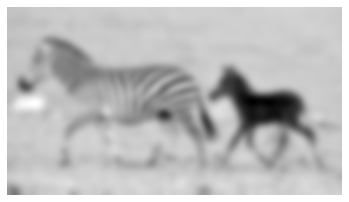

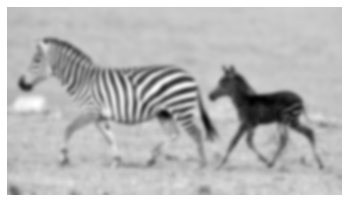

In [14]:
from scipy import ndimage

#filtro gaussiano
gauss_image = ndimage.gaussian_filter(zebra, 20)

gauss_image_second = ndimage.gaussian_filter(zebra, 10)

myimshow(gauss_image)
myimshow(gauss_image_second)

In [15]:
'''
Quello che succede è che si ottiene lo sharpening. Lo si può vedere come a partire dall'immagine in cui è stato applicato il gaussiano con sigma 20, 
applicandogli un gaussiano con sigma 10 otteniamo un miglioramento dell'immagine.
'''

"\nQuello che succede è che si ottiene lo sharpening. Lo si può vedere come a partire dall'immagine in cui è stato applicato il gaussiano con sigma 20, \napplicandogli un gaussiano con sigma 10 otteniamo un miglioramento dell'immagine.\n"

# Esercizio 4

Identificare i cerchi verdi tramite trasformata di Hough contornandoli con un quadrato

![](forme.jpg)

<ipython-input-16-c54eaa04e9c8>:29: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.rectangle(img_forme, square[0], square[2], (0,255,0), 3)


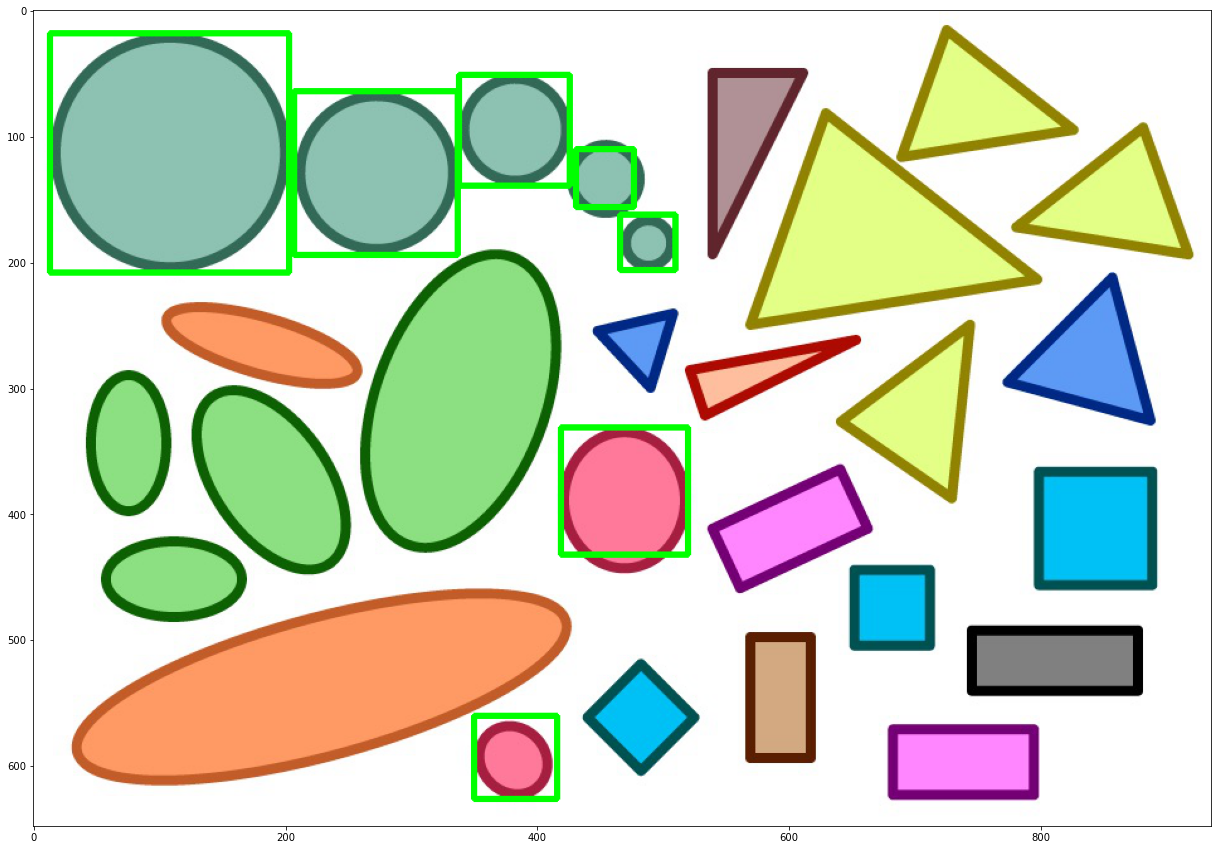

In [16]:
import skimage
import cv2

def get_square(circles):
    squares = []
    for circle in circles:
        x = circle[0]
        y = circle[1]
        r = circle[2]
        
        a = (x-r,y-r)
        b = (x+r,y-r)
        c = (x+r,y+r)
        d = (x-r,y+r)
        squares.append([a,b,c,d])
    return squares

forme_colored = np.array(imageio.imread('forme.jpg'))
forme =  rgb2gray(forme_colored)

img = skimage.img_as_ubyte(forme)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, minDist=50, param1=50, param2=45, minRadius=22, maxRadius=110)        
circles = np.squeeze(circles)

squares = get_square(circles)

img_forme = np.copy(forme_colored)
for square in squares:
    cv2.rectangle(img_forme, square[0], square[2], (0,255,0), 3)

plt.rcParams["figure.figsize"] = (25,15)    
plt.imshow(img_forme)

# Trovo anche i due cerchi in basso, effettivamente sono molto approssimabili a cerchi

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 60° in senso orario in (15, 25) e una traslazione di 75 px sull'asse x.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

In [28]:
from scipy import linalg
from scipy.ndimage import affine_transform
from matplotlib import cm

zebra =  imageio.imread('zebra.jpg')

fig = plt.figure(figsize=(30, 30))

kernel = np.array([[0,0,0],[0,0,1],[0,0,0]])

traslata = zebra[:,:,0]
for i in range(75):
    traslata = convolve(zebra, kernel)
    # non capisco quale possa essere il problema dei pesa che mi rileva il computer all'applicazione di tale filtro
    # lo faccio 75 volte per il filtro effettua lo shift di un solo pixel per come è definito


src=traslata[:,:,0]

center=np.array([15,25])

a=60.0*np.pi/180.0
transform=np.array([[np.cos(a),-np.sin(a)],[np.sin(a),np.cos(a)]])

offset=(center-center.dot(transform)).dot(linalg.inv(transform))
dst=affine_transform(src,transform,order=2,offset=-offset)
    
plt.imshow(dst,cmap=cm.gray)
plt.axis('off')
plt.show()

RuntimeError: filter weights array has incorrect shape.

<Figure size 2160x2160 with 0 Axes>